9.000900090009


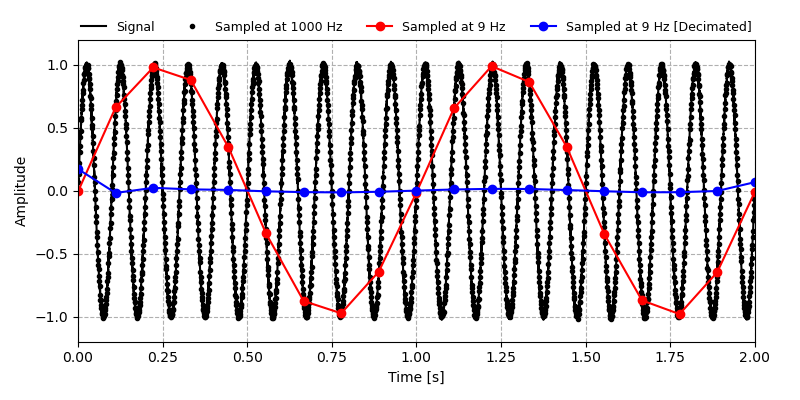

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(8, 4))
ax1 = plt.subplot(1, 1, 1)


omega0 = 2 * np.pi * 10.0

time = np.linspace(0, 2, 20000, endpoint=False)
signal = np.sin(omega0 * time) + np.random.randn(time.size) * 0.01
print(1 / (time[1] - time[0]) / 1111)
ax1.plot(time, signal, 'k-', label = 'Signal')
ax1.plot(time[::10], signal[::10], 'k.', label='Sampled at 1000 Hz')
ax1.plot(time[::1111], signal[::1111], 'ro-', label='Sampled at 9 Hz')

import scipy.signal
signal_dem = scipy.signal.decimate(signal, 1111, n = 3, ftype='iir')

ax1.plot(time[::1111], signal_dem, 'bo-', label='Sampled at 9 Hz [Decimated]')

# plt.title('Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(linestyle = '--')

ax1.set_xlim(0, 2)
ax1.set_ylim(-1.2, 1.2)

ax1.legend(loc='upper center', fontsize=9, frameon=False, ncol = 4, bbox_to_anchor=(0.5, 1.1))
plt.tight_layout()

plt.savefig('figure_aliasing' + '.png',bbox_inches='tight',dpi=300)

plt.show()

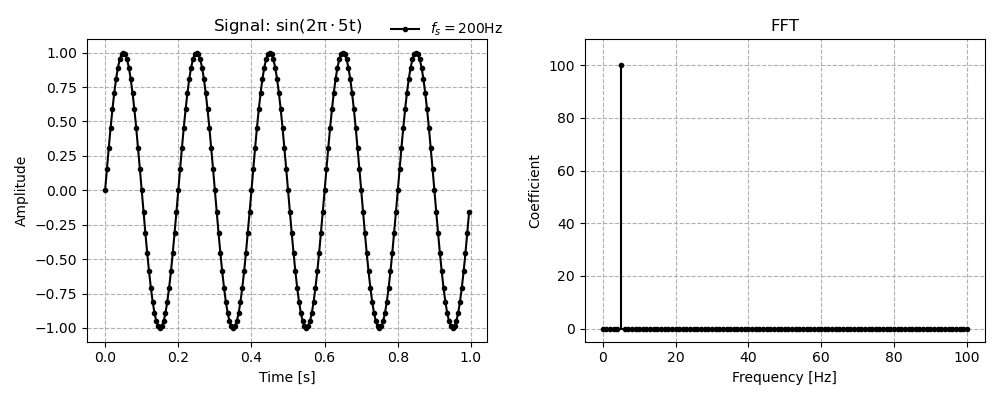

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

omega0 = 2 * np.pi * 5.0
# omega1 = 2 * np.pi * 12.0

time = np.linspace(0, 1, 200, endpoint=False)
# signal = np.sin(omega0 * time) + np.sin(omega1 * time)
signal = np.sin(omega0 * time)

ax1.plot(time, signal, 'k.-', label = '$\mathit{f_s}=$200Hz')

coefs = np.fft.rfft(signal)
freqs = np.fft.rfftfreq(len(time), time[1] - time[0])


ax2.stem(freqs, np.abs(coefs), linefmt = 'k', markerfmt = 'k.', basefmt = 'k-')


ax1.set_title('Signal: $\mathrm{sin(2\pi \cdot 5t)}$')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude')

ax2.set_title('FFT')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Coefficient')

# ax2.set_xlim(-20, 20)
ax2.set_ylim(-5, 110)

ax1.grid('on', linestyle = '--')
ax2.grid('on', linestyle = '--')

ax1.legend(frameon = False, bbox_to_anchor = (0.9, 1.1), loc = 'upper center')

plt.tight_layout()


# plt.savefig('figure_dft_negative_frequency' + '.png',bbox_inches='tight',dpi=300)

plt.show()

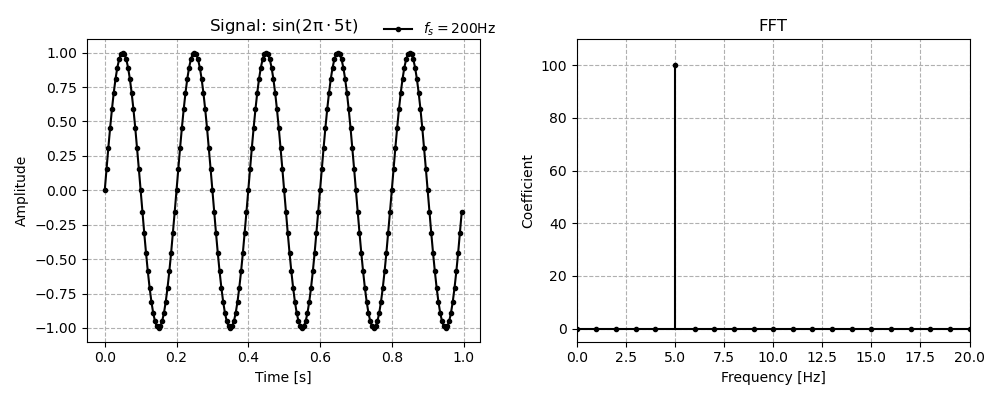

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

omega0 = 2 * np.pi * 5.0
# omega1 = 2 * np.pi * 12.0

time = np.linspace(0, 1, 200, endpoint=False)
# signal = np.sin(omega0 * time) + np.sin(omega1 * time)
signal = np.sin(omega0 * time)

ax1.plot(time, signal, 'k.-', label = '$\mathit{f_s}=$200Hz')

coefs = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(time), time[1] - time[0])

pos_mask = freqs >= 0
freqs = freqs[pos_mask]

ax2.stem(freqs, np.abs(coefs)[pos_mask], linefmt = 'k', markerfmt = 'k.', basefmt = 'k-')

N_PADDING = 20

time = np.linspace(0, 1 + N_PADDING / 200, 200 + N_PADDING, endpoint=False)
signal = np.sin(omega0 * time)
signal *= np.hanning(np.size(signal)) * np.sqrt(8 / 3)
# signal[:200] *= np.hanning(200) * np.sqrt(8 / 3)
signal[-(N_PADDING + 1):] *= 0

# ax1.plot(time, signal, 'r.-', label = 'Windowed [Hanning]', alpha = 0.5)

coefs = np.fft.fft(signal, n = len(time))
freqs = np.fft.fftfreq(len(time), time[1] - time[0])

pos_mask = freqs >= 0
freqs = freqs[pos_mask]

# ax2.stem(freqs, np.abs(coefs)[pos_mask], linefmt = 'r', markerfmt = 'r.', basefmt = 'r-')

for N_PADDING in range(1, 100, 2):
    coefs = np.fft.fft(signal, n = len(time) + N_PADDING)
    freqs = np.fft.fftfreq(len(time) + N_PADDING, time[1] - time[0])

    pos_mask = freqs >= 0
    freqs = freqs[pos_mask]
    arg_max = np.argmax(np.abs(coefs)[pos_mask])
    # ax2.plot(freqs[arg_max], np.abs(coefs)[pos_mask][arg_max], 'g.')

ax1.set_title('Signal: $\mathrm{sin(2\pi \cdot 5t)}$')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude')

ax2.set_title('FFT')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Coefficient')

ax2.set_xlim(0, 20)
ax2.set_ylim(-5, 110)

ax1.grid('on', linestyle = '--')
ax2.grid('on', linestyle = '--')

ax1.legend(frameon = False, bbox_to_anchor = (0.9, 1.1), loc = 'upper center')

plt.tight_layout()


plt.savefig('figure_dft' + '.png',bbox_inches='tight',dpi=300)

plt.show()

<>:77: SyntaxWarning: invalid escape sequence '\m'
<>:77: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1461670/860208433.py:77: SyntaxWarning: invalid escape sequence '\m'
  plt.text(0.7, 1.08, '$\mathbf{2^n}$', transform=ax3.transAxes, ha = 'center', va = 'bottom', color = 'b', fontweight='bold')


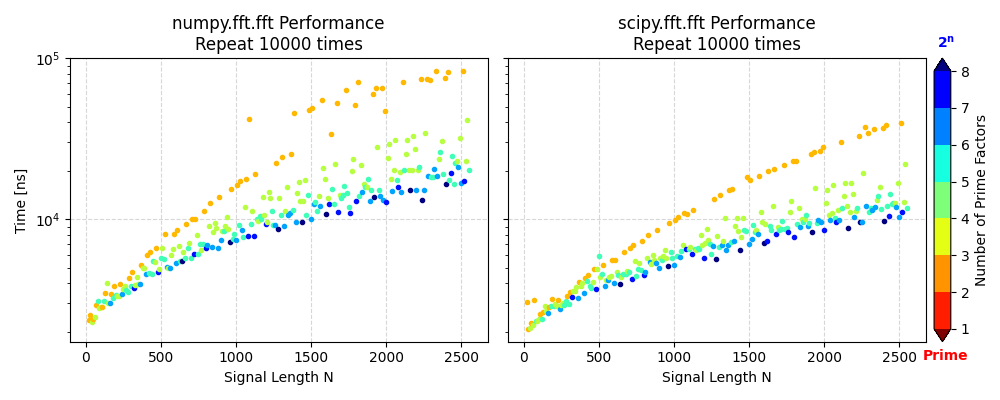

In [5]:
import matplotlib
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import sympy.ntheory.factor_
import scipy
import matplotlib.ticker

%matplotlib ipympl
plt.close()

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, sharex = ax1, sharey = ax1)

N_LENGTHS = np.arange(2, 257, 1) * 10
TIME_PER_THOUSAND_RUNS_NUMPY = np.zeros(N_LENGTHS.size)
TIME_PER_THOUSAND_RUNS_SCIPY = np.zeros(N_LENGTHS.size)
N_REPEATS = 10000

for N_LENGTH in N_LENGTHS:
    signal = np.random.randn(N_LENGTH)

    _start_time = time.perf_counter_ns()

    for _ in range (N_REPEATS):
        coefs = np.fft.fft(signal)

    _end_time = time.perf_counter_ns()

    TIME_PER_THOUSAND_RUNS_NUMPY[N_LENGTHS == N_LENGTH] = (_end_time - _start_time) / 1e9 / N_REPEATS

    _start_time = time.perf_counter_ns()

    for _ in range (N_REPEATS):
        coefs = scipy.fft.fft(signal, workers = -1)

    _end_time = time.perf_counter_ns()

    TIME_PER_THOUSAND_RUNS_SCIPY[N_LENGTHS == N_LENGTH] = (_end_time - _start_time) / 1e9 / N_REPEATS


ax1.grid('on', linestyle = '--', alpha = 0.5)
ax2.grid('on', linestyle = '--', alpha = 0.5)

for i in range(2, 256, 1):
    n = N_LENGTHS[i - 2]
    n_prime_factor = sum(sympy.ntheory.factor_.factorint(n).values())
    # n_prime_factor = sum(sympy.ntheory.factor_.factorint(scipy.fft.next_fast_len(n)).values())

    sc1 = ax1.plot(n, 1e9 * TIME_PER_THOUSAND_RUNS_NUMPY[i - 2], color = matplotlib.cm.jet_r(((n_prime_factor - 1) / 7)), marker = '.', label = 'FFT')
    ax2.plot(n, 1e9 * TIME_PER_THOUSAND_RUNS_SCIPY[i - 2], color = matplotlib.cm.jet_r((n_prime_factor - 1) / 7), marker = '.', label = 'FFT')


ax1.set_ylabel('Time [ns]')
ax1.set_xlabel('Signal Length N')

# ax2.set_ylabel('Time [ns]')
ax2.set_xlabel('Signal Length N')

ax1.set_title('numpy.fft.fft Performance\n' + f"Repeat {N_REPEATS} times")
ax2.set_title('scipy.fft.fft Performance\n' + f"Repeat {N_REPEATS} times")

ax1.set_yscale('log')

cmap = matplotlib.cm.jet_r
bounds = [1, 2, 3, 4, 5, 6, 7, 8]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N, extend='both')

ax3 = ax2.inset_axes([1.02, 0.00, 0.04, 1.0])
cbar = plt.gcf().colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax3, orientation='vertical',
             label="Number of Prime Factors")

plt.text(0.7, -.08, 'Prime', transform=ax3.transAxes, ha = 'center', va = 'top', color = 'r', fontweight='bold')
plt.text(0.7, 1.08, '$\mathbf{2^n}$', transform=ax3.transAxes, ha = 'center', va = 'bottom', color = 'b', fontweight='bold')

plt.setp(ax2.get_yticklabels(), visible=False)

plt.tight_layout()

plt.savefig('figure_fft_performance' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [9]:
import bottleneck as bn
bn.move_mean(np.array([1, 2, 3, 4, 5, 6, 7, 8]), window=3, min_count=1)

array([1. , 1.5, 2. , 3. , 4. , 5. , 6. , 7. ])

In [20]:
N_LENGTH = 20000
N_REPEATS = 10

signal = np.random.normal(0, 1, (N_LENGTH, N_LENGTH))
_start_time = time.perf_counter_ns()

for _ in range (N_REPEATS):
    coefs = scipy.fft.fft(signal, axis = 0, workers = 8)
_end_time = time.perf_counter_ns()

print(f"Time for {N_REPEATS} runs: {(_end_time - _start_time) / 1e9:.3f} seconds")

Time for 10 runs: 23.425 seconds


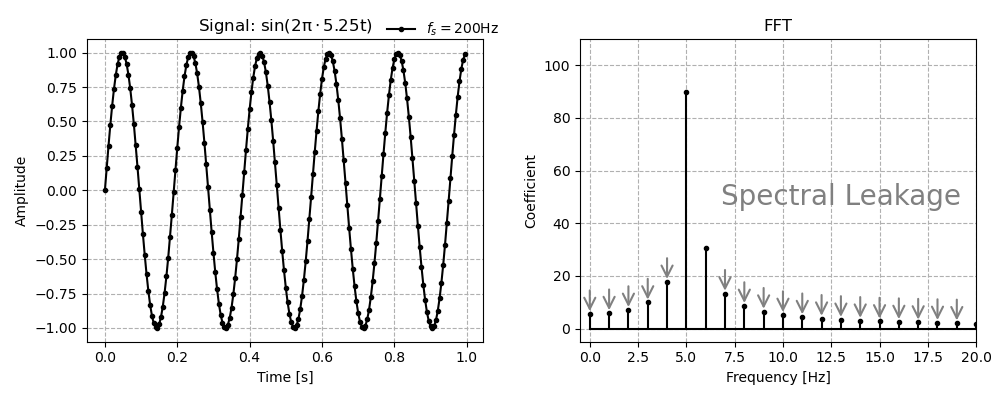

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

omega0 = 2 * np.pi * 5.25

time = np.linspace(0, 1, 200, endpoint=False)
# signal = np.sin(omega0 * time) + np.sin(omega1 * time)
signal = np.sin(omega0 * time)

ax1.plot(time, signal, 'k.-', label = '$\mathit{f_s}=$200Hz')

coefs = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(time), time[1] - time[0])

pos_mask = freqs >= 0
freqs = freqs[pos_mask]

ax2.stem(freqs, np.abs(coefs)[pos_mask], linefmt = 'k', markerfmt = 'k.', basefmt = 'k-')

ax1.set_title('Signal: $\mathrm{sin(2\pi \cdot 5.25 t)}$')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude')

ax2.set_title('FFT')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Coefficient')

ax2.set_xlim(-0.5, 20)
ax2.set_ylim(-5, 110)

ax1.grid('on', linestyle = '--')
ax2.grid('on', linestyle = '--')

ax1.legend(frameon = False, bbox_to_anchor = (0.9, 1.1), loc = 'upper center')

plt.tight_layout()

ax2.text(13, 50., 'Spectral Leakage', fontsize=20, ha='center', va='center', rotation=-0, color='grey', alpha=1.0)

for i in range(0, 20, 1):
    if i not in [5, 6]:
        ax2.annotate('', xy=(freqs[i], np.abs(coefs[i])), xytext=(freqs[i], np.abs(coefs[i]) + 10),
                        arrowprops=dict(arrowstyle='->', lw=1.5, color='grey', alpha=1.0),
                        fontsize=20, ha='center', va='center', rotation=-0, color='grey', alpha=1.0)

plt.savefig('figure_dft_spectral_leakage' + '.png',bbox_inches='tight',dpi=300)

plt.show()

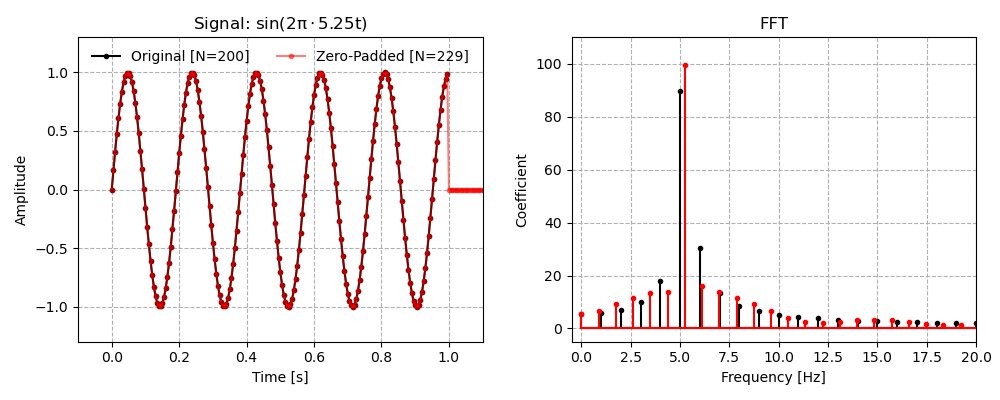

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

omega0 = 2 * np.pi * 5.25

time = np.linspace(0, 1, 200, endpoint=False)
signal = np.sin(omega0 * time)

ax1.plot(time, signal, 'k.-', label = 'Original [N=200]')

coefs = np.fft.fft(signal, n = len(time) + 0)
freqs = np.fft.fftfreq(len(time) + 0, time[1] - time[0])

pos_mask = freqs >= 0
freqs = freqs[pos_mask]

ax2.stem(freqs, np.abs(coefs)[pos_mask], linefmt = 'k', markerfmt = 'k.', basefmt = 'k-')


time = np.arange(0, 8 / 7, 1 / 200)
signal = np.sin(omega0 * time)
signal[200:] *= 0
# signal *= np.sqrt(signal.size / 200)

ax1.plot(time, signal, 'r.-', label = f'Zero-Padded [N={time.size}]', alpha = 0.5)

coefs = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(time), time[1] - time[0])

pos_mask = freqs >= 0
freqs = freqs[pos_mask]

ax2.stem(freqs, np.abs(coefs)[pos_mask], linefmt = 'r', markerfmt = 'r.', basefmt = 'r-')


ax1.set_title('Signal: $\mathrm{sin(2\pi \cdot 5.25 t)}$')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude')

ax2.set_title('FFT')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Coefficient')

ax2.set_xlim(-0.5, 20)
ax2.set_ylim(-5, 110)

ax1.grid('on', linestyle = '--')
ax2.grid('on', linestyle = '--')

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.0), loc = 'upper center', ncols = 2)

ax1.set_ylim(-1.3, 1.3)
ax1.set_xlim(-0.1, 1.1)

plt.tight_layout()

# ax2.text(13, 50., 'Spectral Leakage', fontsize=20, ha='center', va='center', rotation=-0, color='grey', alpha=1.0)

# for i in range(0, 20, 1):
#     if i not in [5, 6]:
#         ax2.annotate('', xy=(freqs[i], np.abs(coefs[i])), xytext=(freqs[i], np.abs(coefs[i]) + 10),
#                         arrowprops=dict(arrowstyle='->', lw=1.5, color='grey', alpha=1.0),
#                         fontsize=20, ha='center', va='center', rotation=-0, color='grey', alpha=1.0)

plt.savefig('figure_dft_spectral_leakage_zero_padding' + '.png',bbox_inches='tight',dpi=300)

plt.show()

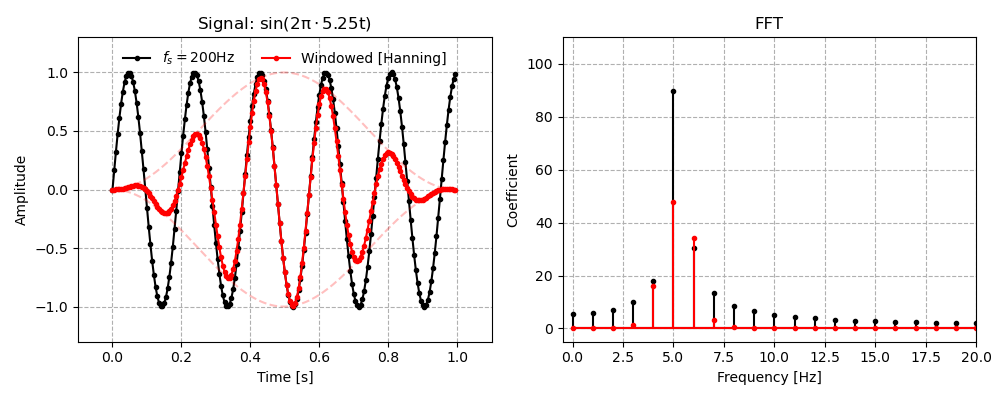

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

omega0 = 2 * np.pi * 5.25

time = np.linspace(0, 1, 200, endpoint=False)
signal = np.sin(omega0 * time)

ax1.plot(time, signal, 'k.-', label = '$\mathit{f_s}=$200Hz')

coefs = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(time), time[1] - time[0])

pos_mask = freqs >= 0
freqs = freqs[pos_mask]

ax2.stem(freqs, np.abs(coefs)[pos_mask], linefmt = 'k', markerfmt = 'k.', basefmt = 'k-')


signal *= np.hanning(np.size(signal))

ax1.plot(time, np.hanning(np.size(signal)), 'r--', alpha = 0.25)
ax1.plot(time, -np.hanning(np.size(signal)), 'r--', alpha = 0.25)

ax1.plot(time, signal, 'r.-', label = 'Windowed [Hanning]')

coefs = np.fft.fft(signal * np.sqrt(3 / 3))
freqs = np.fft.fftfreq(len(time), time[1] - time[0])

pos_mask = freqs >= 0
freqs = freqs[pos_mask]

ax2.stem(freqs, np.abs(coefs)[pos_mask], linefmt = 'r', markerfmt = 'r.', basefmt = 'r-')


# signal *= np.sqrt(8 / 3)

# ax1.plot(time, signal, 'b.-', label = 'Windowed [Hanning + Normalized]')

# coefs = np.fft.fft(signal)
# freqs = np.fft.fftfreq(len(time), time[1] - time[0])

# pos_mask = freqs >= 0
# freqs = freqs[pos_mask]

# ax2.stem(freqs, np.abs(coefs)[pos_mask], linefmt = 'b', markerfmt = 'b.', basefmt = 'b-')


ax1.set_ylim(-1.3, 1.3)
ax1.set_title('Signal: $\mathrm{sin(2\pi \cdot 5.25 t)}$')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude')

ax2.set_title('FFT')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Coefficient')

ax2.set_xlim(-0.5, 20)
ax2.set_ylim(-5, 110)

ax1.grid('on', linestyle = '--')
ax2.grid('on', linestyle = '--')

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.0), loc = 'upper center', ncols = 2)

ax1.set_ylim(-1.3, 1.3)
ax1.set_xlim(-0.1, 1.1)

plt.tight_layout()

# ax2.text(13, 50., 'Spectral Leakage', fontsize=20, ha='center', va='center', rotation=-0, color='grey', alpha=1.0)

# for i in range(0, 20, 1):
#     if i not in [5, 6]:
#         ax2.annotate('', xy=(freqs[i], np.abs(coefs[i])), xytext=(freqs[i], np.abs(coefs[i]) + 10),
#                         arrowprops=dict(arrowstyle='->', lw=1.5, color='grey', alpha=1.0),
#                         fontsize=20, ha='center', va='center', rotation=-0, color='grey', alpha=1.0)

plt.savefig('figure_dft_spectral_leakage_window' + '.png',bbox_inches='tight',dpi=300)

plt.show()

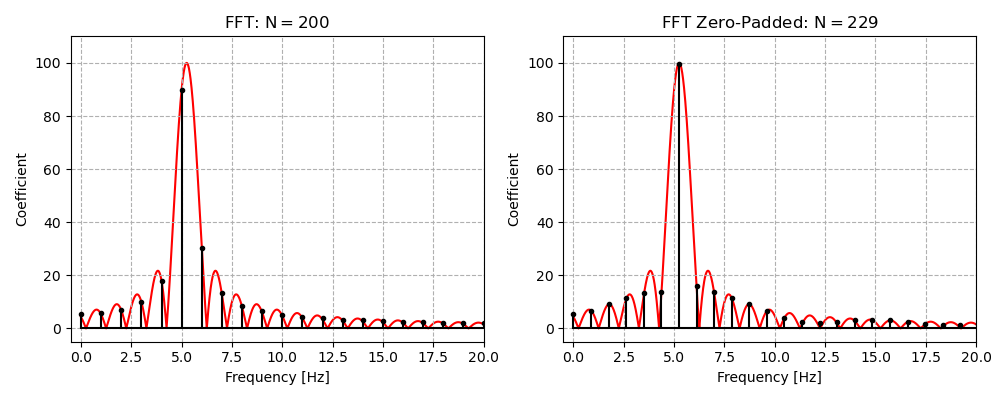

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

omega0 = 2 * np.pi * 5.25

time = np.linspace(0, 1, 200, endpoint=False)
signal = np.sin(omega0 * time)


coefs = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(time), time[1] - time[0])

pos_mask = freqs >= 0

ax1.stem(freqs[pos_mask], np.abs(coefs)[pos_mask], linefmt = 'k', markerfmt = 'k.', basefmt = 'k-')


coefs = np.fft.fft(signal, n = 229)
freqs = np.fft.fftfreq(len(coefs), time[1] - time[0])

pos_mask = freqs >= 0

ax2.stem(freqs[pos_mask], np.abs(coefs)[pos_mask], linefmt = 'k', markerfmt = 'k.', basefmt = 'k-')



for ax in [ax1, ax2]:
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Coefficient')

    ax.set_xlim(-0.5, 20)
    ax.set_ylim(-5, 110)

    ax.grid('on', linestyle = '--')

    _freqs = np.linspace(0, 20, 2000)

    ax.plot(_freqs, 100 * np.abs(np.sinc(np.abs(_freqs - 5.25))), 'r-', alpha = 1., zorder = -1)

ax1.set_title('FFT: $\mathrm{N=200}$')
ax2.set_title('FFT Zero-Padded: $\mathrm{N=229}$')

plt.tight_layout()

plt.savefig('figure_dft_picket_fence_effect' + '.png',bbox_inches='tight',dpi=300)

plt.show()

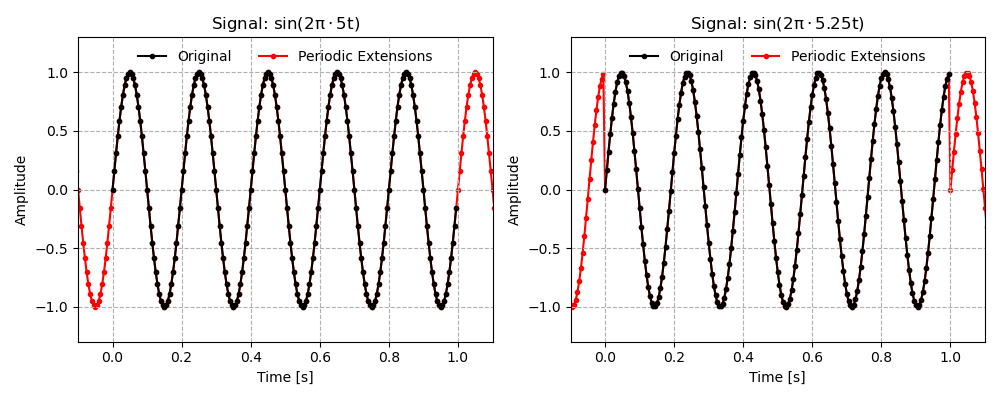

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

omega0 = 2 * np.pi * 5.0

time = np.linspace(0, 1, 200, endpoint=False)
signal = np.sin(omega0 * time)

ax1.plot(time, signal, 'k.-', label = 'Original')

time = np.concatenate((time - 1, time, time + 1))
signal = np.concatenate((signal, signal, signal))

ax1.plot(time, signal, 'r.-', label = 'Periodic Extensions', zorder = -1)


omega0 = 2 * np.pi * 5.25

time = np.linspace(0, 1, 200, endpoint=False)
signal = np.sin(omega0 * time)

ax2.plot(time, signal, 'k.-', label = 'Original')

time = np.concatenate((time - 1, time, time + 1))
signal = np.concatenate((signal, signal, signal))

ax2.plot(time, signal, 'r.-', label = 'Periodic Extensions', zorder = -1)


for ax in [ax1, ax2]:
    ax.set_ylim(-1.3, 1.3)
    ax.set_xlim(-0.1, 1.1)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')
    ax.grid('on', linestyle = '--')
    ax.legend(frameon = False, bbox_to_anchor = (0.5, 1.0), loc = 'upper center', ncols = 2)

ax1.set_title('Signal: $\mathrm{sin(2\pi \cdot 5 t)}$')
ax2.set_title('Signal: $\mathrm{sin(2\pi \cdot 5.25 t)}$')

plt.tight_layout()


plt.savefig('figure_dft_periodic_extensions' + '.png',bbox_inches='tight',dpi=300)

plt.show()

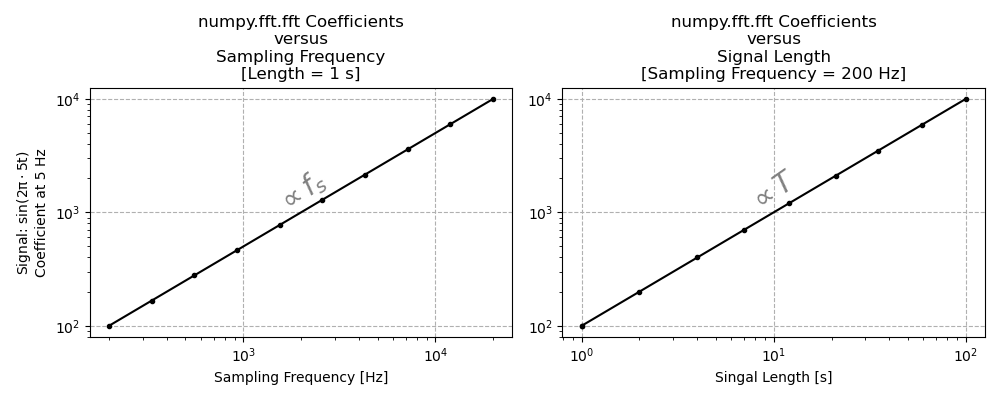

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

omega = 2 * np.pi * 5.0

sampling_frequencies = np.geomspace(200, 20000, 10, dtype=int)

peak_coefs = []
duration = 1

for sampling_frequency in sampling_frequencies:
    time = np.linspace(0, duration, duration * sampling_frequency, endpoint=False)
    signal = np.sin(omega * time)
    coefs = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(time), time[1] - time[0])
    peak_coefs.append(np.max(np.abs(coefs)))

ax1.plot(sampling_frequencies, peak_coefs, 'k.-', label = 'Original')
# ax1.plot(sampling_frequencies, peak_coefs / sampling_frequencies, 'r.-', label = 'Normalized by Sampling Frequency')

sampling_frequency = 200
durations = np.geomspace(1, 100, 10, dtype=int)
peak_coefs = []

for duration in durations:
    time = np.linspace(0, duration, duration * sampling_frequency, endpoint=False)
    signal = np.sin(omega * time)
    coefs = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(time), time[1] - time[0])
    peak_coefs.append(np.max(np.abs(coefs)))

ax2.plot(durations, peak_coefs, 'k.-', label = 'Original')
# ax2.plot(durations, peak_coefs / durations, 'r.-', label = 'Normalized by $T$')

ax1.set_title('numpy.fft.fft Coefficients\nversus\nSampling Frequency\n[Length = 1 s]')
ax2.set_title('numpy.fft.fft Coefficients\nversus\nSignal Length\n[Sampling Frequency = 200 Hz]')


for ax in [ax1, ax2]:
    ax.grid('on', linestyle = '--')
    ax.set_xscale('log')
    ax.set_yscale('log')
    # ax.legend(frameon = False, bbox_to_anchor = (0.5, 1.0), loc = 'upper center', ncols = 2)

ax1.set_xlabel('Sampling Frequency [Hz]')
ax2.set_xlabel('Singal Length [s]')

ax1.set_ylabel('Signal: $\mathrm{sin(2\pi \cdot 5 t)}$\nCoefficient at 5 Hz')
# ax2.set_ylabel('Coefficient at 5 Hz')

# ax1.set_ylim(2e-1, 6e4)
# ax2.set_ylim(2e-1, 6e4)

plt.tight_layout()

ax1.text(2e3, 1.5e3, '$\propto f_s$', fontsize=20, ha='center', va='center', rotation=35, color='grey', alpha=1.0)
ax2.text(1e1, 1.5e3, '$\propto T$', fontsize=20, ha='center', va='center', rotation=35, color='grey', alpha=1.0)

plt.savefig('figure_fft_normalization' + '.png',bbox_inches='tight',dpi=300)

plt.show()

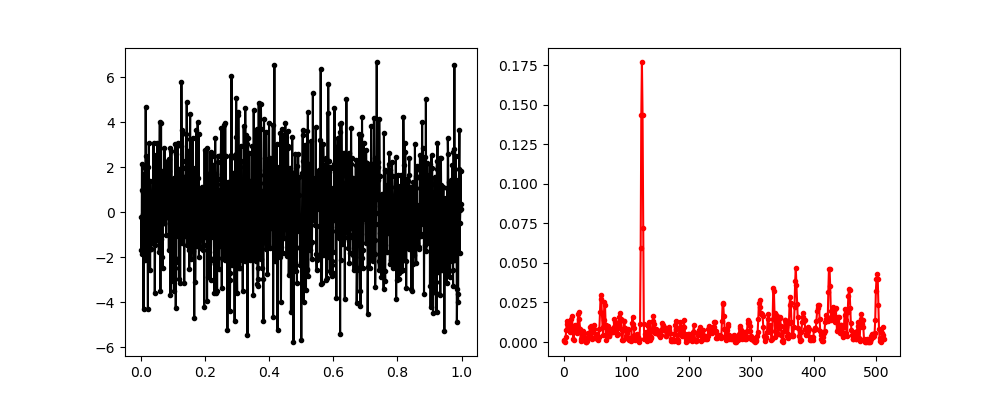

In [16]:
import scipy.signal
plt.close()
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
omega0 = 2 * np.pi * 125.5
time = np.linspace(0, 1, 2 ** 10, endpoint=False)
fs = 1 / (time[1] - time[0])
signal = 1.0 * np.sin(omega0 * time) * (1 - 4 * (time - 0.5) ** 2)
signal += np.random.randn(time.size) * 2.0

ax1.plot(time, signal, 'k.-', label = 'Original')

freq, psd = scipy.signal.welch(signal, fs, window = 'flattop', nperseg=signal.size)
ax2.plot(freq, psd, 'r.-', label = 'Welch')
# ax1.hist(psd, bins=np.linspace(0, 0.02, 32), color='k', alpha=0.5, label = 'Histogram')
# ax1.plot(np.linspace(0, 0.02, 32), 100 * np.exp(-np.linspace(0, 0.02, 32) * 50), 'r--')
# ax2.set_yscale('log')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


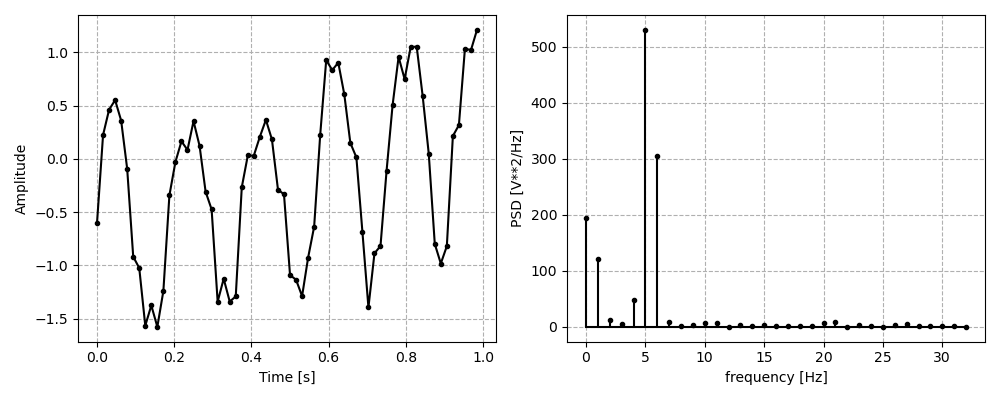

In [17]:
import scipy.signal
%matplotlib ipympl
plt.close()
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

omega0 = 2 * np.pi * 5

time = np.linspace(0, 1, 2 ** 6, endpoint=False)
omega = np.random.normal(omega0, 0.2 * omega0, time.size)
phase = np.cumsum(omega) * (time[1] - time[0]) + np.random.uniform(0, 2 * np.pi)
signal = 1 * (time ** 2 - 0.5) + np.sin(phase) + np.random.randn(time.size) * 0.2
# signal = 1 * np.sin(omega0 * time) + np.random.randn(time.size) * 1.0
fs = 1 / (time[1] - time[0])

ax1.plot(time, signal, 'k.-', label = 'Original')

signal *= np.hanning(np.size(signal)) * np.sqrt(8 / 3)
coefs = np.fft.rfft(signal)
freqs = np.fft.rfftfreq(len(time), time[1] - time[0])


ax2.stem(freqs, np.abs(coefs) ** 2, linefmt = 'k', markerfmt = 'k.', basefmt = 'k-')


ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time [s]')

ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel('PSD [V**2/Hz]')

# ax2.set_yscale('log')

ax2.legend(frameon = False, bbox_to_anchor = (0.5, 1.0), loc = 'upper center', ncol = 1)

for ax in [ax1, ax2]:
    ax.grid('on', linestyle = '--')


plt.tight_layout()

plt.show()

In [ ]:
plt.close()
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)


omega0 = 2 * np.pi * 5.0
time = np.linspace(0, 1, 2 ** 7, endpoint=False)
fs = 1 / (time[1] - time[0])

N_SAMPLE = 100000
peak_energy = np.zeros(N_SAMPLE)
noise_energy = np.zeros(N_SAMPLE)

for i in range(N_SAMPLE):
    omega = np.random.normal(omega0, 0.0 * omega0, time.size)
    phase = np.cumsum(omega) * (time[1] - time[0]) + np.random.uniform(0, 2 * np.pi)
    signal = 1 * (time ** 2 - 0.5) + np.sin(phase) + np.random.randn(time.size) * 0.2
    signal *= np.hanning(np.size(signal)) * np.sqrt(8 / 3)
    coefs = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(len(time), time[1] - time[0])

    noise_energy[i] = (np.abs(coefs) ** 2)[10] / fs
    peak_energy[i] = (np.abs(coefs) ** 2)[5] / fs

# h_noise = ax1.hist((noise_energy), bins=np.linspace(0, 1, 256), color='r', alpha=0.5, label = 'Histogram', density = True)
h_noise = ax1.hist(np.log10(noise_energy), bins=np.linspace(-5, 1, 256), color='r', alpha=0.5, label = 'Histogram', density = True)
h = ax2.hist((peak_energy), bins=np.linspace(0, 100, 256), color='k', alpha=0.5, label = 'Histogram', density = True)

lamb = np.mean(noise_energy)

ax1.plot(np.linspace(0, 1, 512), h_noise[0][0] * np.exp(-np.linspace(0, 1, 512) / lamb), 'b--', label = 'Exponential Fit')

phi = np.random.uniform(0, 2 * np.pi, N_SAMPLE)
u = np.random.normal(0, 1, N_SAMPLE) * np.sqrt(lamb / 2)
v = np.random.normal(0, 1, N_SAMPLE) * np.sqrt(lamb / 2)
x0 = 4.58

# x0 = 4.50

ax1.hist((u ** 2 + v ** 2), bins=np.linspace(0, 1, 256), color='g', alpha=0.5, label = 'Gaussian Fit', density = True)

ax2.hist(x0 ** 2 + 2 * x0 * (u * np.cos(phi) + v * np.sin(phi)) + (u ** 2 + v ** 2), bins=np.linspace(0, 100, 256), color='g', alpha=0.5, label = 'Gaussian Fit', density = True)

# ax1.set_xlim(0, 1)
plt.show()

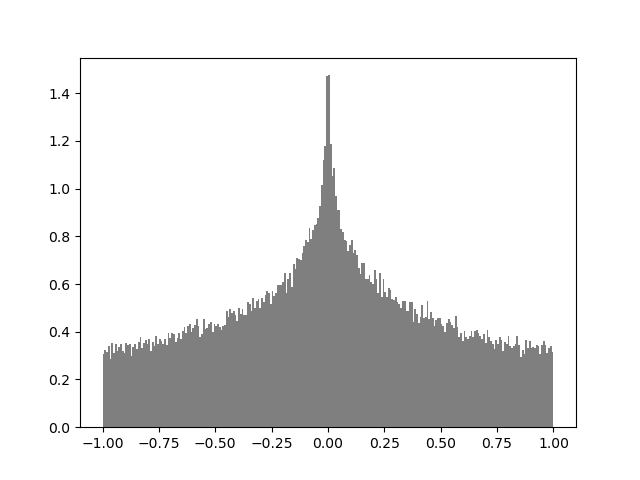

In [ ]:
plt.close()
ax1 = plt.subplot()
N_SAMPLE = 100000

phi1 = np.random.uniform(0, 2 * np.pi, N_SAMPLE)
phi2 = np.random.uniform(0, 2 * np.pi, N_SAMPLE)


u1 = np.sin(phi1) * np.sin(phi2)
u2 = np.sin(phi1)

ax1.hist((u1), bins=np.linspace(-1, 1, 257), color='k', alpha=0.5, label = 'Histogram', density = True)
# ax1.hist(1 - np.abs(u2), bins=np.linspace(-1, 1, 257), color='r', alpha=0.5, label = 'Histogram', density = True)

plt.show()

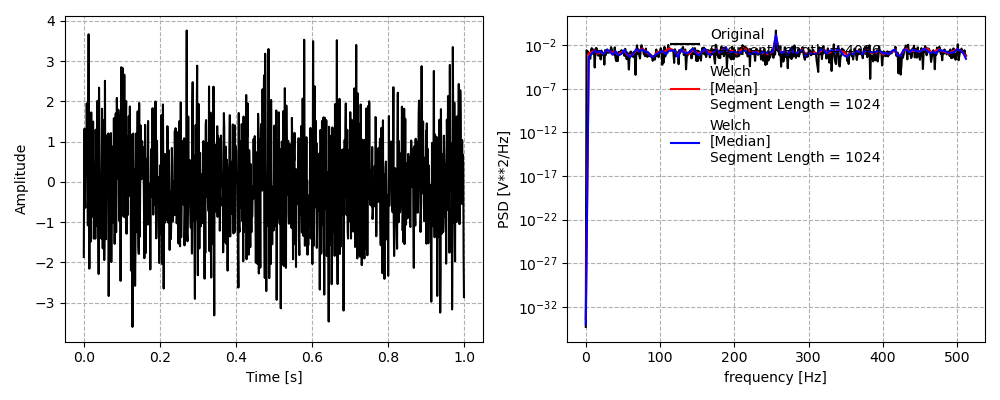

ValueError: Axis limits cannot be NaN or Inf

In [ ]:
import scipy.signal
%matplotlib ipympl
plt.close()
plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

omega0 = 2 * np.pi * 256

time = np.linspace(0, 1, 2 ** 10, endpoint=False)
signal = 1 * np.sin(omega0 * time) + np.random.randn(time.size) * 1.0
# signal[256 : -256] += 1
# signal[512 : ] += 1
fs = 1 / (time[1] - time[0])


ax1.plot(time, signal, 'k-', label = 'Signal')

freq, psd_mean = scipy.signal.welch(signal, fs, window = 'boxcar', nperseg=2 ** 10)
ax2.plot(freq, psd_mean, label='Original\nSegment Length = 4096', color = 'k')

freq, psd_mean = scipy.signal.welch(signal, fs, window = 'boxcar', nperseg = 2 ** 8, average='mean')
_, psd_median = scipy.signal.welch(signal, fs, window = 'boxcar', nperseg = 2 ** 8, average='median')

# ax2.stem(freq, psd_mean, label='Welch\n[Mean]\nSegment Length = 1024', linefmt = 'r', markerfmt = 'r.', basefmt = 'r-', alpha = 0.5)
# ax2.stem(freq, psd_median, label='Welch\n[Median]\nSegment Length = 1024', linefmt = 'b', markerfmt = 'b.', basefmt = 'b-')

ax2.plot(freq, psd_mean, label='Welch\n[Mean]\nSegment Length = 1024', color = 'r')
ax2.plot(freq, psd_median, label='Welch\n[Median]\nSegment Length = 1024', color = 'b')

ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time [s]')

ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel('PSD [V**2/Hz]')

ax2.set_yscale('log')

ax2.legend(frameon = False, bbox_to_anchor = (0.5, 1.0), loc = 'upper center', ncol = 1)

for ax in [ax1, ax2]:
    ax.grid('on', linestyle = '--')


plt.tight_layout()

# plt.savefig('figure_fft_normalization' + '.png',bbox_inches='tight',dpi=300)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


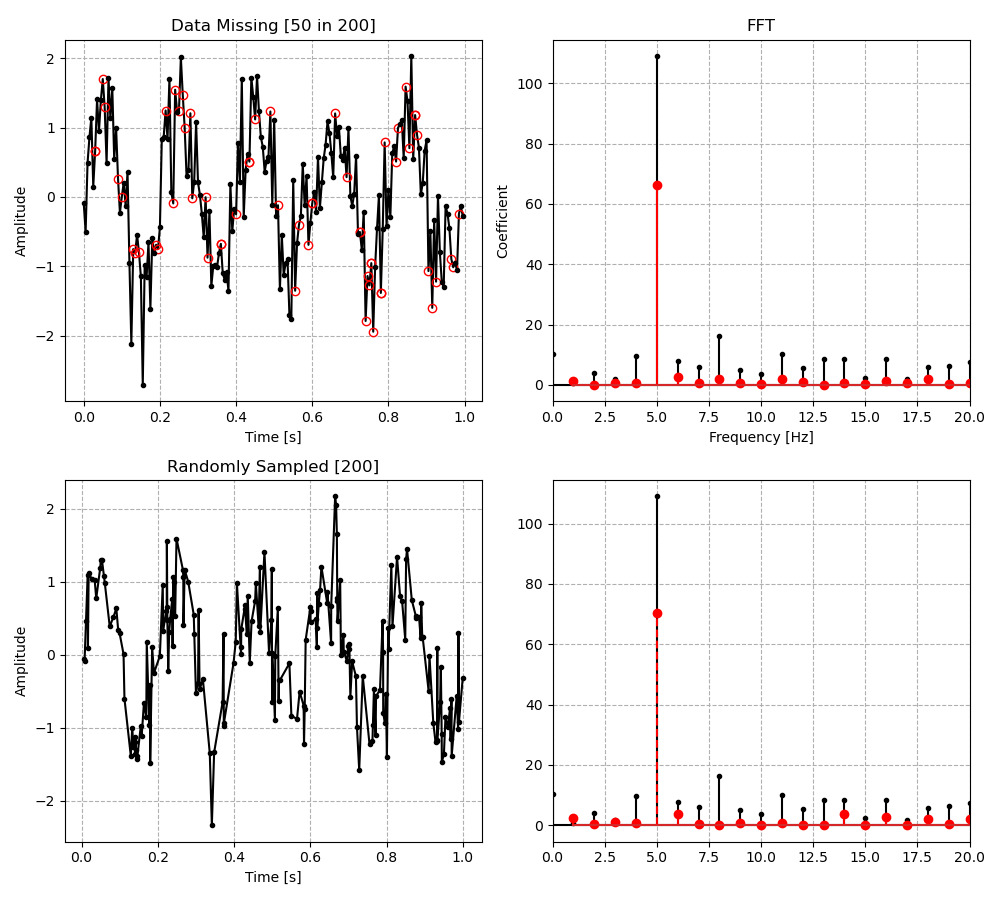

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(10, 9))
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

omega0 = 2 * np.pi * 5.0

time = np.linspace(0, 1, 200, endpoint=False)
fs = 1 / (time[1] - time[0])
signal = np.sin(omega0 * time) + np.random.randn(time.size) * 0.5

ax1.plot(time, signal, 'k-')

coefs = np.fft.rfft(signal)
freqs = np.fft.rfftfreq(len(time), time[1] - time[0])

ax2.stem(freqs, np.abs(coefs), linefmt = 'k', markerfmt = 'k.', basefmt = 'k-')
ax4.stem(freqs, np.abs(coefs), linefmt = 'k', markerfmt = 'k.', basefmt = 'k-')

data_miss_idx = np.random.randint(0, 200, 60)
ax1.plot(time[data_miss_idx], signal[data_miss_idx], 'ro', fillstyle = 'none')

signal[data_miss_idx] = np.nan

ax1.plot(time, signal, 'k.')

ls_amp = scipy.signal.lombscargle(time[~np.isnan(signal)], signal[~np.isnan(signal)], 2 * np.pi * freqs[1:], normalize='amplitude')

ax2.stem(freqs[1:], ls_amp * freqs.size, 'r-', label = 'Lomb-Scargle')

time = np.random.uniform(0, 1, 200)
time.sort()
signal = np.sin(omega0 * time) + np.random.randn(time.size) * 0.5
ax3.plot(time, signal, 'k.-')


ls_amp = scipy.signal.lombscargle(time[~np.isnan(signal)], signal[~np.isnan(signal)], 2 * np.pi * freqs[1:], normalize='amplitude')

ax4.stem(freqs[1:], ls_amp * freqs.size, 'r--', label = 'Lomb-Scargle')


ax1.set_title('Data Missing [50 in 200]')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude')

ax3.set_title('Randomly Sampled [200]')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Amplitude')

ax2.set_title('FFT')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Coefficient')

ax2.set_xlim(0, 20)
ax4.set_xlim(0, 20)
# ax2.set_ylim(-5, 110)

for ax in [ax1, ax2, ax3, ax4]:
    ax.grid('on', linestyle = '--')

ax1.legend(frameon = False, bbox_to_anchor = (0.9, 1.1), loc = 'upper center')

plt.tight_layout()


# plt.savefig('figure_dft_negative_frequency' + '.png',bbox_inches='tight',dpi=300)

plt.show()

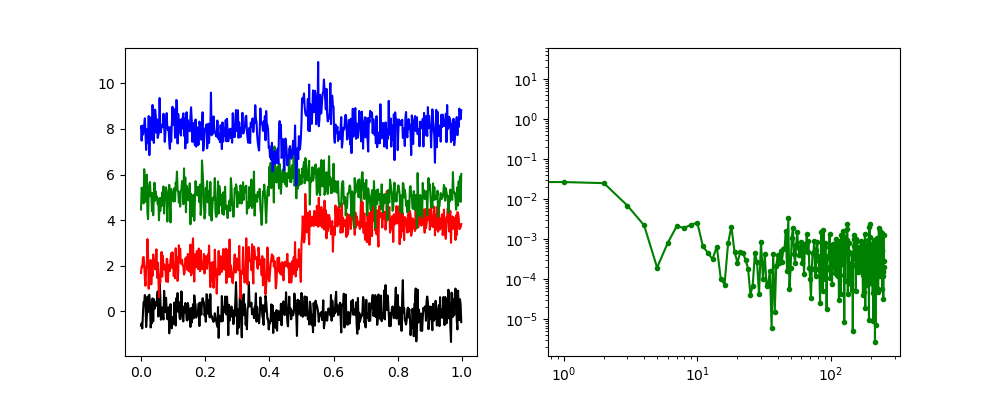

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

time = np.linspace(0, 1, 500, endpoint=False)
fs = 1 / (time[1] - time[0])
freq = np.fft.rfftfreq(len(time), time[1] - time[0])

noise = 0.5
signal_1 = 0 + (time == 0.5).astype(float) + np.random.randn(time.size) * noise
signal_2 = 3 + np.sign(time - 0.5) + np.random.randn(time.size) * noise
signal_3 = 5 + (np.abs(time - 0.5) < 0.1).astype(float) + np.random.randn(time.size) * noise
signal_4 = 8 + (np.abs(time - 0.5) < 0.1).astype(float) * np.sign(time - 0.5) + np.random.randn(time.size) * noise

ax1.plot(time, signal_1, 'k-')
ax1.plot(time, signal_2, 'r-')
ax1.plot(time, signal_3, 'g-')
ax1.plot(time, signal_4, 'b-')


coef_1 = np.fft.rfft(signal_1, axis=-1).T
psd_1 = (np.abs(coef_1) ** 2) / fs / time.size

coef_2 = np.fft.rfft(signal_2, axis=-1).T
psd_2 = (np.abs(coef_2) ** 2) / fs / time.size

coef_3 = np.fft.rfft(signal_3, axis=-1).T
psd_3 = (np.abs(coef_3) ** 2) / fs / time.size

coef_4 = np.fft.rfft(signal_4, axis=-1).T
psd_4 = (np.abs(coef_4) ** 2) / fs / time.size

# ax2.plot(freq, psd_1, 'k.-', label = 'Impulse')
# ax2.plot(freq, psd_2, 'r.-', label = 'Step')
ax2.plot(freq, psd_3, 'g.-', label = 'Boxcar')
# ax2.plot(freq, psd_4, 'b.-', label = 'Ramp')

ax2.set_xscale('log')
ax2.set_yscale('log')

plt.show()

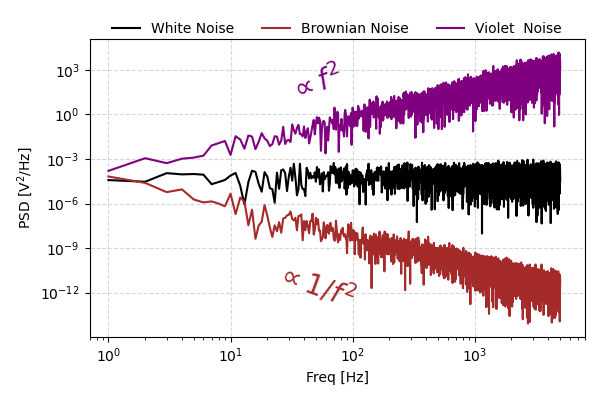

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(6, 4))
ax1 = plt.subplot(1, 1, 1)

time = np.linspace(0, 1, 10000, endpoint=False)
fs = 1 / (time[1] - time[0])
freq = np.fft.rfftfreq(len(time), time[1] - time[0])

noise_white = np.random.randn(time.size)

coef_white = np.fft.rfft(noise_white, axis=-1).T
psd_white = (np.abs(coef_white) ** 2) / fs / time.size

noise_brownian_fft = np.fft.rfft(np.random.randn(time.size))
noise_brownian_fft[1:] /= freq[1:] ** 1
noise_brownian_fft[0] = 0
noise_brownian = np.fft.irfft(noise_brownian_fft)

coef_brownian = np.fft.rfft(noise_brownian, axis=-1).T
psd_brownian = (np.abs(coef_brownian) ** 2) / fs / time.size


noise_violet_fft = np.fft.rfft(np.random.randn(time.size))
noise_violet_fft[1:] /= freq[1:] ** -1
noise_violet_fft[0] = 0
noise_violet = np.fft.irfft(noise_violet_fft)

coef_violet = np.fft.rfft(noise_violet, axis=-1).T
psd_violet = (np.abs(coef_violet) ** 2) / fs / time.size

ax1.plot(freq[1:], psd_white[1:], 'k-', label = 'White Noise')
ax1.plot(freq[1:], psd_brownian[1:], color = 'brown', linestyle = '-', label = 'Brownian Noise')
ax1.plot(freq[1:], psd_violet[1:], color = 'purple', linestyle = '-', label = 'Violet  Noise')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.grid('on', linestyle = '--', alpha = 0.5)

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.1), loc = 'upper center', ncol = 5)

ax1.set_xlabel('Freq [Hz]')
ax1.set_ylabel('PSD [$\mathrm{V^2/Hz}$]')

plt.tight_layout()

ax1.text(50, 1e2, '${\propto f^2}$', fontsize=20, rotation = 20, ha='center', va='center', color='purple', alpha=1.0)
ax1.text(50, 3e-12, '${\propto 1/f^{2}}$', fontsize=20, rotation = -20, ha='center', va='center', color='brown', alpha=1.0)
ax1.set_xlim(0.7, 8e3)

plt.savefig('figure_noise' + '.png',bbox_inches='tight',dpi=300)

plt.show()

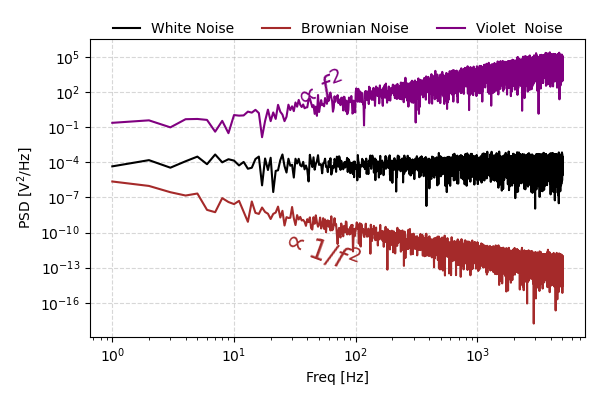

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(6, 4))
ax1 = plt.subplot(1, 1, 1)

time = np.linspace(0, 1, 10000, endpoint=False)
dt = time[1] - time[0]
fs = 1 / dt
freq = np.fft.rfftfreq(len(time), time[1] - time[0])

noise_white = np.random.randn(time.size)
coef_white = np.fft.rfft(noise_white, axis=-1).T
psd_white = (np.abs(coef_white) ** 2) / fs / time.size

noise_brownian = np.cumsum(np.random.randn(time.size)) * dt
coef_brownian = np.fft.rfft(noise_brownian, axis=-1).T
psd_brownian = (np.abs(coef_brownian) ** 2) / fs / time.size

noise_violet = np.diff(np.random.randn(time.size + 1)) / dt
coef_violet = np.fft.rfft(noise_violet, axis=-1).T
psd_violet = (np.abs(coef_violet) ** 2) / fs / time.size

ax1.plot(freq[1:], psd_white[1:], 'k-', label = 'White Noise')
ax1.plot(freq[1:], psd_brownian[1:], color = 'brown', linestyle = '-', label = 'Brownian Noise')
ax1.plot(freq[1:], psd_violet[1:], color = 'purple', linestyle = '-', label = 'Violet  Noise')

# ax1.plot(freq[1:], np.ones_like(freq[1:]) / fs, 'k--', alpha = 0.5, zorder = 1)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.grid('on', linestyle = '--', alpha = 0.5)

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.1), loc = 'upper center', ncol = 5)

ax1.set_xlabel('Freq [Hz]')
ax1.set_ylabel('PSD [$\mathrm{V^2/Hz}$]')

plt.tight_layout()

ax1.text(50, 1e2, '${\propto f^2}$', fontsize=20, rotation = 20, ha='center', va='center', color='purple', alpha=1.0)
ax1.text(50, 3e-12, '${\propto 1/f^{2}}$', fontsize=20, rotation = -20, ha='center', va='center', color='brown', alpha=1.0)

# plt.savefig('figure_noise' + '.png',bbox_inches='tight',dpi=300)

plt.show()

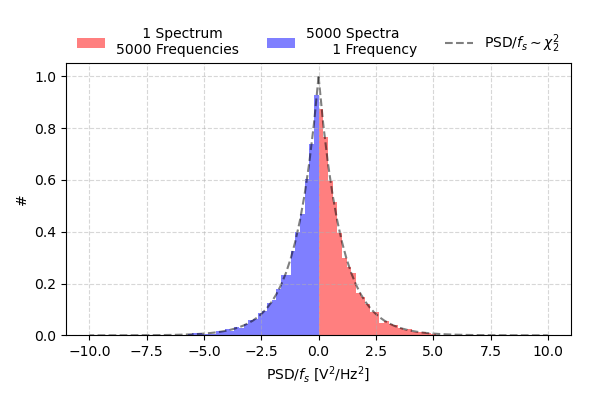

In [83]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(6, 4))
ax1 = plt.subplot(1, 1, 1)

time = np.linspace(0, 1, 10000, endpoint=False)
fs = 1 / (time[1] - time[0])
freq = np.fft.rfftfreq(len(time), time[1] - time[0])

noise_white = np.random.randn(time.size)

coef_white = np.fft.rfft(noise_white, axis=-1).T
psd_white = (np.abs(coef_white) ** 2) / fs / time.size

bins = np.linspace(0, 10, 50)

ax1.hist(psd_white[1:] * fs , bins=bins, color='r', alpha=0.5, density = True, label = f'      1 Spectrum\n{freq.size - 1} Frequencies')

N_SAMPLE = int(time.size / 2)
psd_white_at_100_Hz = np.zeros(N_SAMPLE)
for i in range(N_SAMPLE):
    noise_white = np.random.randn(time.size)

    coef_white = np.fft.rfft(noise_white, axis=-1).T
    psd_white = (np.abs(coef_white) ** 2) / fs / time.size
    psd_white_at_100_Hz[i] = psd_white[100 + 1]

ax1.hist(-psd_white_at_100_Hz * fs, bins=-bins[::-1], color='b', alpha=0.5, density = True, label = f'{psd_white_at_100_Hz.size} Spectra\n      1 Frequency')

ax1.plot(bins, 1 * np.exp(-bins), 'k--', alpha = 0.5, zorder = 1, label = 'PSD/$f_s \sim \chi_2^2$')
ax1.plot(-bins, 1 * np.exp(-bins), 'k--', alpha = 0.5, zorder = 1)


for ax in [ax1]:
    ax.grid('on', linestyle = '--', alpha = 0.5)

    ax.legend(frameon = False, bbox_to_anchor = (0.5, 1.18), loc = 'upper center', ncol = 5)

    ax.set_xlabel('PSD/$f_s$ [$\mathrm{V^2/Hz^2}$]')
    ax.set_ylabel('#')

plt.tight_layout()


plt.savefig('figure_noise_hist' + '.png',bbox_inches='tight',dpi=300)

plt.show()

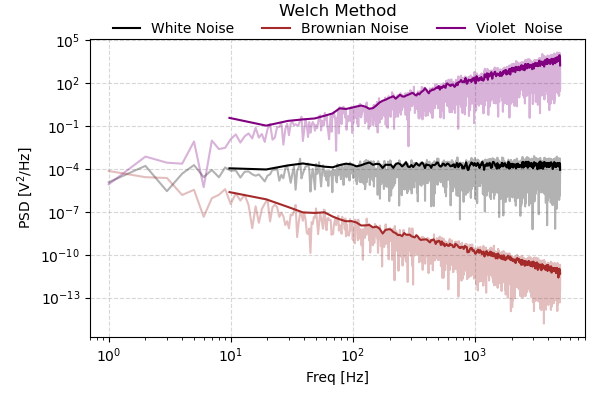

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(6, 4))
ax1 = plt.subplot(1, 1, 1)

time = np.linspace(0, 1, 10000, endpoint=False)
fs = 1 / (time[1] - time[0])
freq = np.fft.rfftfreq(len(time), time[1] - time[0])

N_PER_SEG = 2 ** 10
window = 'hann'
noise_white = np.random.randn(time.size)

coef_white = np.fft.rfft(noise_white, axis=-1).T
psd_white = (np.abs(coef_white) ** 2) / fs / time.size

freq_welch, psd_white_welch = scipy.signal.welch(noise_white, fs, window = window, nperseg=N_PER_SEG)

noise_brownian_fft = np.fft.rfft(np.random.randn(time.size))
noise_brownian_fft[1:] /= freq[1:] ** 1
noise_brownian_fft[0] = 0
noise_brownian = np.fft.irfft(noise_brownian_fft)

coef_brownian = np.fft.rfft(noise_brownian, axis=-1).T
psd_brownian = (np.abs(coef_brownian) ** 2) / fs / time.size

freq_welch, psd_brownian_welch = scipy.signal.welch(noise_brownian, fs, window = window, nperseg=N_PER_SEG)


noise_violet_fft = np.fft.rfft(np.random.randn(time.size))
noise_violet_fft[1:] /= freq[1:] ** -1
noise_violet_fft[0] = 0
noise_violet = np.fft.irfft(noise_violet_fft)

coef_violet = np.fft.rfft(noise_violet, axis=-1).T
psd_violet = (np.abs(coef_violet) ** 2) / fs / time.size

freq_welch, psd_violet_welch = scipy.signal.welch(noise_violet, fs, window = window, nperseg=N_PER_SEG)

ax1.plot(freq[1:], psd_white[1:], 'k-', alpha = 0.3)
ax1.plot(freq[1:], psd_brownian[1:], color = 'brown', linestyle = '-', alpha = 0.3)
ax1.plot(freq[1:], psd_violet[1:], color = 'purple', linestyle = '-', alpha = 0.3)

ax1.plot(freq_welch[1:], psd_white_welch[1:], 'k-', label = 'White Noise')
ax1.plot(freq_welch[1:], psd_brownian_welch[1:], color = 'brown', linestyle = '-', label = 'Brownian Noise')
ax1.plot(freq_welch[1:], psd_violet_welch[1:], color = 'purple', linestyle = '-', label = 'Violet  Noise')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.grid('on', linestyle = '--', alpha = 0.5)

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.1), loc = 'upper center', ncol = 5)

ax1.set_xlabel('Freq [Hz]')
ax1.set_ylabel('PSD [$\mathrm{V^2/Hz}$]')

plt.tight_layout()

ax1.set_xlim(0.7, 8e3)

ax1.set_title('Welch Method', y = 1.05)
plt.savefig('figure_noise_welch' + '.png',bbox_inches='tight',dpi=300)

plt.show()

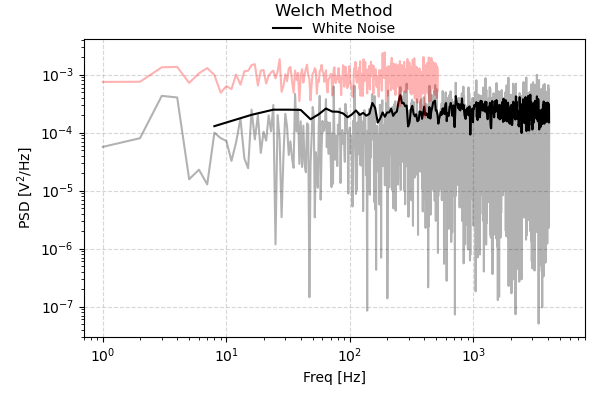

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(6, 4))
ax1 = plt.subplot(1, 1, 1)

time = np.linspace(0, 1, 2 ** 13, endpoint=False)
fs = 1 / (time[1] - time[0])
freq = np.fft.rfftfreq(len(time), time[1] - time[0])

N_PER_SEG = 2 ** 10
window = 'hann'
noise_white = np.random.randn(time.size)

coef_white = np.fft.rfft(noise_white, axis=-1).T
psd_white = (np.abs(coef_white) ** 2) / fs / time.size

freq_welch, psd_white_welch = scipy.signal.welch(noise_white, fs, window = window, nperseg=N_PER_SEG)

N_DOWNSAMPLE = 2 ** 3
time_downsampled = time[::N_DOWNSAMPLE]
dt_downsampled = time_downsampled[1] - time_downsampled[0]
fs_downsampled = 1 / dt_downsampled
freq_downsampled = np.fft.rfftfreq(len(time_downsampled), dt_downsampled)

psd_downsampled = np.zeros(freq_downsampled.size, dtype = float)

for i in range(N_DOWNSAMPLE):
    _coef = np.fft.rfft(noise_white[i::N_DOWNSAMPLE], axis=-1).T
    _psd = (np.abs(_coef) ** 2) / fs_downsampled / time_downsampled.size
    psd_downsampled += _psd / N_DOWNSAMPLE

ax1.plot(freq[1:], psd_white[1:], 'k-', alpha = 0.3)

ax1.plot(freq_welch[1:], psd_white_welch[1:], 'k-', label = 'White Noise')

ax1.plot(freq_downsampled[1:], psd_downsampled[1:], 'r-', alpha = 0.3)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.grid('on', linestyle = '--', alpha = 0.5)

ax1.legend(frameon = False, bbox_to_anchor = (0.5, 1.1), loc = 'upper center', ncol = 5)

ax1.set_xlabel('Freq [Hz]')
ax1.set_ylabel('PSD [$\mathrm{V^2/Hz}$]')

plt.tight_layout()

ax1.set_xlim(0.7, 8e3)

ax1.set_title('Welch Method', y = 1.05)
# plt.savefig('figure_noise_welch' + '.png',bbox_inches='tight',dpi=300)

plt.show()

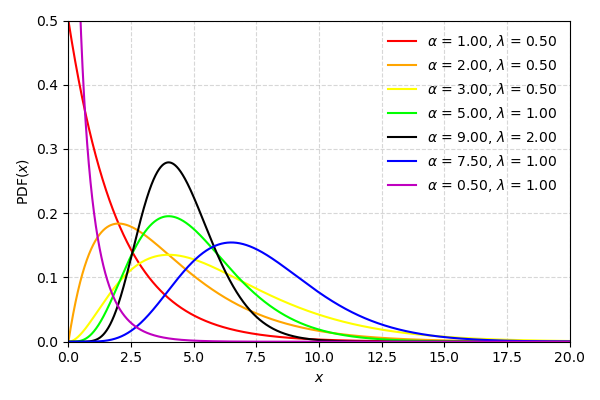

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.stats
%matplotlib ipympl
plt.close()

plt.figure(figsize=(6, 4))
ax1 = plt.subplot(1, 1, 1)
x = np.linspace(0, 20, 100000, endpoint=False)

parameters = [(1.0, 2.0), (2.0, 2.0), (3.0, 2.0), (5.0, 1.0), (9.0, 0.5), (7.5, 1.0), (0.5, 1.0)]
colors = ['r', 'orange', 'yellow', 'lime', 'k', 'blue', 'm']

for i in np.arange(len(parameters)):
    alpha = parameters[i][0]
    theta = parameters[i][1]
    color = colors[i]
    pdf = scipy.stats.gamma.pdf(x, alpha, 0, theta)
    pdf[pdf == 0] = np.nan
    ax1.plot(x, pdf, color = color, linestyle = '-', label = r"$\alpha$ = %.2f, $\lambda$ = %.2f" % (alpha, 1 / theta))

ax1.grid('on', linestyle = '--', alpha = 0.5)

ax1.legend(frameon = False, loc = 'upper right')

ax1.set_ylim(0, 0.5)
ax1.set_xlim(0, 20)

ax1.set_xlabel('$x$')
ax1.set_ylabel(r'PDF(${x}$)')

plt.tight_layout()

plt.savefig('figure_gamma_distribution' + '.png',bbox_inches='tight',dpi=300)

plt.show()

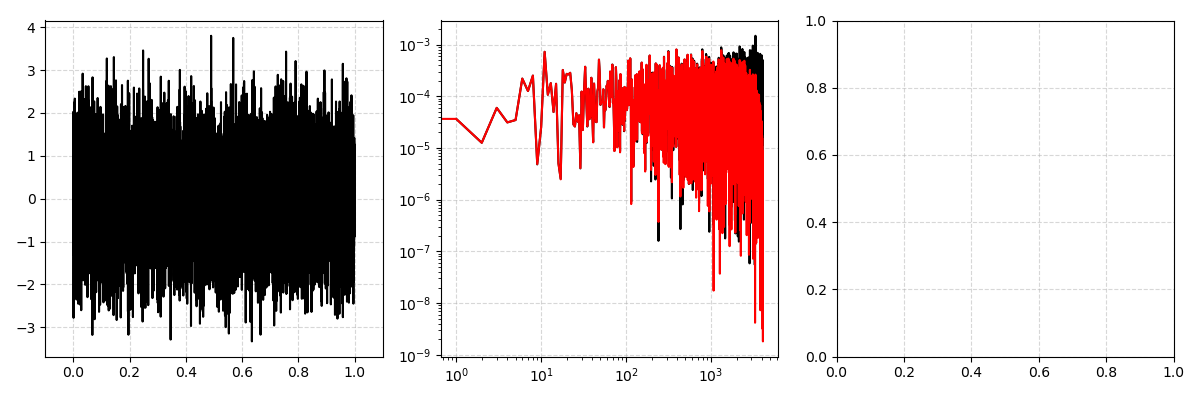

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.stats
%matplotlib ipympl
plt.close()

plt.figure(figsize=(12, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

omega = 2 * np.pi * 25.0
time = np.linspace(0, 1, 2 ** 13, endpoint=False)
dt = time[1] - time[0]
fs = 1 / dt
freq = np.fft.rfftfreq(len(time), dt)

signal = np.sin(omega * time) * 0.0 + np.random.randn(time.size) * 1.0

coef = np.fft.rfft(signal, axis=-1).T
psd = (np.abs(coef) ** 2) / fs / time.size

ax1.plot(time, signal, 'k-')
ax1.set_xlim(-0.1, 1.1)

ax2.plot(freq[1:], psd[1:], 'k-', label = 'FFT')

acfs = np.correlate(signal, signal, mode='full') / signal.size
# acfs = acfs[signal.size - 1:] / signal.size

ax2.plot(freq[:-1], np.real(np.fft.rfft(acfs))[::2] / fs, 'r-', label = 'ACF')

ax2.set_yscale('log')
ax2.set_xscale('log')

for ax in [ax1, ax2, ax3]:
    ax.grid('on', linestyle = '--', alpha = 0.5)
plt.tight_layout()

plt.show()

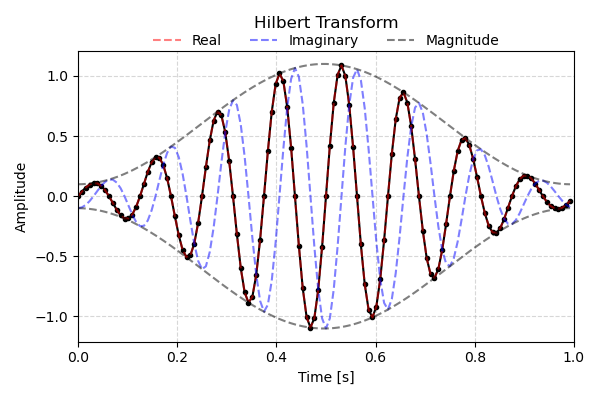

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
%matplotlib ipympl
plt.close()

plt.figure(figsize=(6, 4))
ax1 = plt.subplot(1, 1, 1)

omega = 2 * np.pi * 8.0
time = np.linspace(0, 1, 2 ** 7, endpoint=False)
dt = time[1] - time[0]
fs = 1 / dt
signal = np.sin(omega * time) * (0.1 + np.hanning(time.size)) + np.random.randn(time.size) * 0.0

ax1.plot(time, signal, 'k.-')

ax1.plot(time, scipy.signal.hilbert(signal).real, 'r--', label = 'Real', alpha = 0.5)
ax1.plot(time, scipy.signal.hilbert(signal).imag, 'b--', label = 'Imaginary', alpha = 0.5)
ax1.plot(time, np.abs(scipy.signal.hilbert(signal)), 'k--', label = 'Magnitude', alpha = 0.5)
ax1.plot(time, -np.abs(scipy.signal.hilbert(signal)), 'k--', alpha = 0.5)

ax1.set_xlim(-0.0, 1.0)

for ax in [ax1]:
    ax.grid('on', linestyle = '--', alpha = 0.5)

ax1.legend(frameon = False, loc = 'upper center', ncol = 3, bbox_to_anchor = (0.5, 1.1))

ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude')
ax1.set_title('Hilbert Transform', y = 1.05)

plt.tight_layout()

plt.savefig('figure_hilbert' + '.png',bbox_inches='tight',dpi=300)

plt.show()

In [55]:
omega0 = 2 * np.pi * 5.0
time = np.linspace(0, 1, 2 ** 7, endpoint=False)
signal = np.sin(omega0 * time)
signal = np.exp(1j * omega0 * time)
np.fft.rfft(signal)

/home/jtzhao/anaconda3/envs/jtzhao/lib/python3.8/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


array([-5.09484886e-15+0.00000000e+00j, -5.24842203e-15-4.23237892e-15j,
       -7.50223774e-15-4.10911874e-15j, -6.15845409e-16+4.42926604e-15j,
       -1.64994963e-14+2.96647249e-15j,  6.40000000e+01-3.87501850e-14j,
        1.28191078e-14+3.23591660e-15j,  5.67088182e-15+1.96505344e-15j,
        1.20841943e-15-8.47471084e-16j,  2.06487181e-16-2.07807914e-15j,
        3.87380944e-16-1.10790245e-15j,  5.15550126e-15+6.09547469e-15j,
        1.41423419e-15+2.53951916e-15j, -2.86316306e-15-3.47677264e-15j,
        2.84134796e-15+2.31499738e-15j, -1.66718967e-15+3.89108694e-16j,
       -2.71501251e-15+2.53815328e-16j,  1.08608547e-15-3.21890151e-16j,
        2.12605255e-15-8.79787503e-16j,  3.61813049e-15+1.65873132e-15j,
       -9.07743466e-16-4.91028953e-16j,  3.27093644e-15-2.23755993e-15j,
        2.53653024e-15+7.86400535e-15j, -1.66023676e-15+8.73268384e-16j,
       -2.19617173e-15+3.11621375e-16j,  1.54675764e-15-1.79548049e-15j,
        1.14570019e-15+3.77881382e-15j,  1.66988646

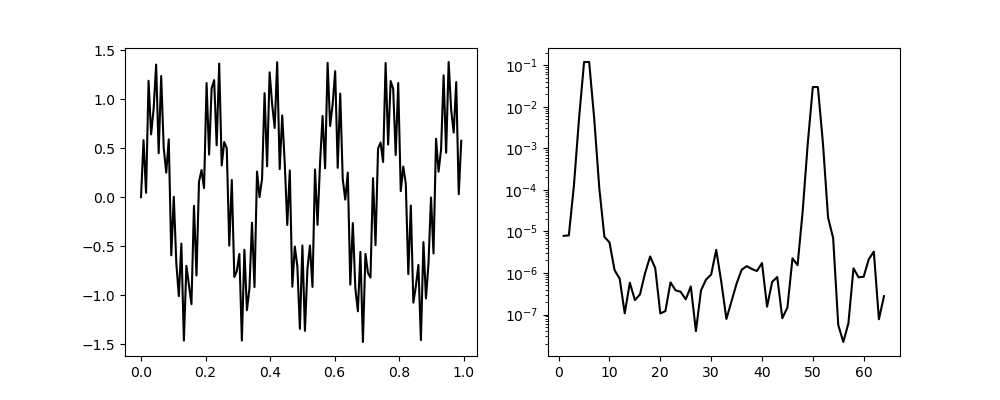

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.close()

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

omega0 = 2 * np.pi * 5.5
omega1 = 2 * np.pi * 50.5
time = np.linspace(0, 1, 2 ** 7, endpoint=False)
dt = time[1] - time[0]
fs = 1 / dt
signal = np.sin(omega0 * time) + 0.5 * np.sin(omega1 * time) + np.random.randn(time.size) * 0.01

ax1.plot(time, signal, 'k-')

signal *= np.hanning(np.size(signal)) * np.sqrt(8 / 3)
coefs = np.fft.rfft(signal, axis=-1).T
psd = (np.abs(coefs) ** 2) / fs / time.size
freqs = np.fft.rfftfreq(len(time), dt)
ax2.plot(freqs[1:], psd[1:], 'k-', label = 'FFT')

ax2.set_yscale('log')

plt.show()

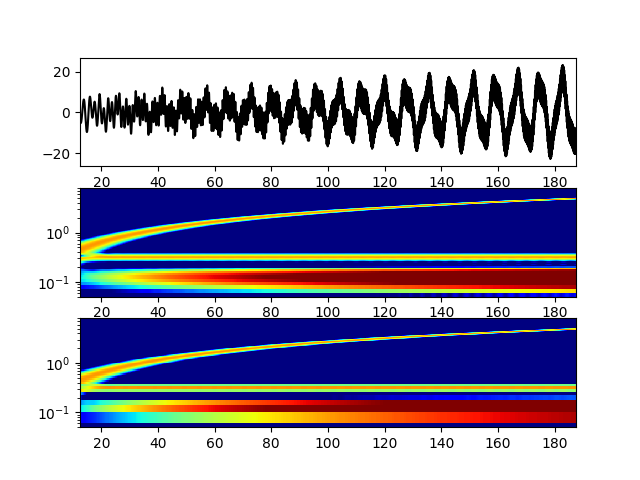

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
%matplotlib ipympl

def wfft_coef_psd(time: np.ndarray, signal: np.ndarray, step: int = 1, window: int = 120):
    """
    Compute short-time Fourier transform (STFT) coefficients and power spectral density (PSD) using a sliding Hanning window.

    Parameters:
    ----------
    time : np.ndarray
        Time vector of shape (Nt,). Can be in seconds or `np.datetime64`.
    signal : np.ndarray
        Input signal of shape (Nt,).
    step : int, optional
        Step size for sliding the window (default is 1).
    window : int, optional
        Window length in samples (default is 120).

    Returns:
    -------
    wtime : np.ndarray
        Center time for each window after sliding.
    freq : np.ndarray
        Frequency vector corresponding to the FFT.
    coef : np.ndarray
        Complex FFT coefficients of shape (Nf, Nt), where Nf is the number of frequencies.
    psd : np.ndarray
        Power spectral density of shape (Nf, Nt).
    wsignal : np.ndarray
        Window-averaged signal of shape (Nt,).

    Notes:
    -----
    - The Hanning window is applied to each segment, and normalization is performed based on Parseval's theorem.
    - The PSD is computed as the squared magnitude of the FFT coefficients, scaled by `2 * dt / window`.
    """

    if isinstance(time[0], np.datetime64):
        elapsed_time = np.array(time).astype('datetime64[ns]').astype('float') / 1e9
    else:
        elapsed_time = np.array(time)

    dt = elapsed_time[1] - elapsed_time[0]

    # Apply sliding window view
    wtime = np.lib.stride_tricks.sliding_window_view(elapsed_time, window)[::step][:, 0] + dt * window / 2
    freq = np.fft.fftfreq(window, dt)[:window // 2]
    freq = np.fft.rfftfreq(window, dt)
    freq = np.abs(freq)
    wsignal = np.lib.stride_tricks.sliding_window_view(signal, window)[::step]

    # Apply Hanning window and normalize based on Parseval's theorem
    wsignal = wsignal * np.sqrt(8 / 3) * np.hanning(window)

    coef = np.fft.fft(wsignal, axis=-1)[:, :window // 2].T
    coef = np.fft.rfft(wsignal, axis=-1).T


    psd = (np.abs(coef) ** 2) * dt / window
    
    # Double the PSD values except for the DC component and Nyquist frequency
    if window % 2 == 0:
        psd[1:-1] *= 2
    else:
        psd[1:] *= 2

    if isinstance(time[0], np.datetime64):
        wtime = (np.array(wtime) * 1e9).astype('datetime64[ns]')

    wsignal = np.mean(wsignal, axis=-1)

    return wtime, freq, coef, psd, wsignal

plt.close()
ax1 = plt.subplot(3, 1, 1)
ax2 = plt.subplot(3, 1, 2, sharex = ax1)
ax3 = plt.subplot(3, 1, 3, sharex = ax1, sharey = ax2)


N = int(2 ** 15)

t = np.linspace(0, 200, N)
dt = t[1] - t[0]
fs = 1 / dt

omega = 0.4

# Generate a signal with 4 components: 
# 1. Sinuoidal; 2. Growing Sinuoidal; 3. Chirping Sinuoidal; 4. White noise

sig = 3 * np.sin(5 * omega * t) + 8 * t / 100 * np.sin(2 * omega * t) + 6 * np.sin(2 * omega * (t + 10) * t / 10)

ax1.plot(t, sig, 'k-', label = 'Signal')

step = 32
window = 4096
mfft = 3 * window

hann_window = scipy.signal.windows.hann(window, sym = True)  # symmetric Gaussian window
STFT = scipy.signal.ShortTimeFFT(hann_window, hop=step, fs = fs, scale_to='psd', fft_mode = 'onesided2X', mfft = mfft)  # create the STFT object
stft_psd = STFT.stft(sig)  # perform the STFT
stft_time = np.arange(0, stft_psd.shape[1]) * STFT.hop / fs - STFT.win.size / 2 / fs  # time vector for STFT
stft_frequency = np.fft.rfftfreq(mfft, d=dt)  # frequency vector for STFT

ax2.pcolormesh(stft_time, stft_frequency, np.log10(np.abs(stft_psd) ** 2), cmap='jet', vmax=2.5, vmin=0.0)

wfft_time, wfft_frequency, wfft_coef, wfft_psd, wfft_avg = wfft_coef_psd(t, sig, step,window)

pc3 = ax3.pcolormesh(wfft_time, wfft_frequency, np.log10(wfft_psd), cmap='jet', vmax=2.5, vmin=0.0)

ax2.set_xlim(wfft_time[0], wfft_time[-1])
ax2.set_ylim(0.05, 8)
ax2.set_yscale('log')



In [90]:
import scipy.constants

2 * np.pi * np.power(71492e3 * (84 + 1) / 2, 1.5) / np.sqrt(scipy.constants.G * 1.90e27) / 86400

np.float64(34.20235644091696)

In [51]:
w = scipy.signal.windows.hann(4096, sym = True)  # symmetric Gaussian window
STFT = scipy.signal.ShortTimeFFT(w, hop=100, fs = fs, scale_to='psd')  # create the STFT object
stft_psd = STFT.stft(sig)  # perform the STFT
STFT.extent()

TypeError: ShortTimeFFT.extent() missing 1 required positional argument: 'n'